# Sarcasm Detection

#### Data Description:
 - is_sarcastic: 1 if the record is sarcastic otherwise 0
 - headline: the headline of the news article
 - article_link: link to the original news article. Useful in collecting supplementary data

[Dataset Info](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_sarcasm = pd.read_json('./Sarcasm_Dataset.json', lines=True)
df_sarcasm = df_sarcasm.drop('article_link', axis=1)

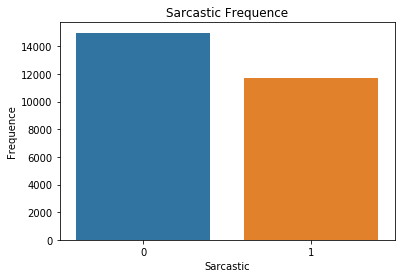

In [179]:
ax = sns.countplot(data=df_sarcasm, x='is_sarcastic')
ax.set(title='Sarcastic Frequence', xlabel="Sarcastic", ylabel="Frequence")
plt.show()

In [4]:
from nltk import wordpunct_tokenize 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

def clean(text):
    
    text = text.lower()
    
    tokens = wordpunct_tokenize(text)
    
    stopw = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopw]

    punctuation = [punctuation for punctuation in string.punctuation]
    tokens = [word for word in tokens if word not in punctuation]

    stemmer = SnowballStemmer('english')
    tokens = [ stemmer.stem(word) for word in tokens ]
    
    return " ".join(tokens)

In [7]:
def text_concat(text_list):
    text = ""
    for x in text_list:
        text += x;
    return text;

text = text_concat(df_sarcasm['headline'])
text = clean(text)
tokens = wordpunct_tokenize(text)

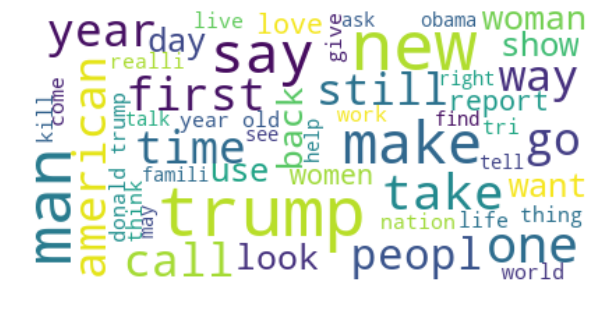

In [8]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(" ".join(tokens))
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

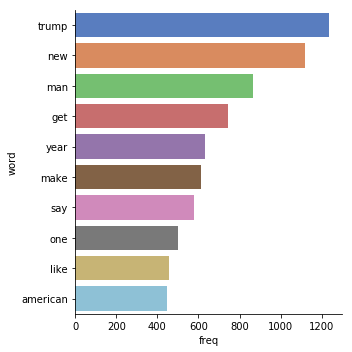

In [9]:
from nltk import FreqDist

freq = FreqDist(tokens)
word_freq = pd.DataFrame(freq.most_common(10), columns=['word','freq'])
sns.catplot(x='freq',y='word',data=word_freq, kind='bar', palette="muted")

In [10]:
df_sarcasm['headline'] = df_sarcasm['headline'].apply(clean)

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

x =  df_sarcasm['headline']
y =  df_sarcasm['is_sarcastic']
tfidf =  TfidfVectorizer().fit(x);
x_tfidf = tfidf.transform(x);

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
results = []

for name, model in models:    
    res = cross_val_score(model, x_tfidf, y, cv=3)
    results.append((name, model, res.mean(), res.std()))
    print("%s - Mean: %f Std: %f" % (name, res.mean(), res.std()))

LogisticRegression - Mean: 0.779887 Std: 0.002213
BernoulliNB - Mean: 0.795125 Std: 0.005266
RandomForestClassifier - Mean: 0.733798 Std: 0.001388


In [225]:
results.sort(key = lambda x : x[3], reverse = True)
model = results[0][1]
model.fit(x_tfidf, y);

In [233]:
sarcastic_quotes=["Light travels faster than sound. This is why some people appear bright until they speak",
    "When people ask me stupid questions, it is my legal obligation to give a sarcastic remark",
    "It’s okay if you don’t like me. Not everyone has good taste.",
    "Mirrors can’t talk, lucky for you they can’t laugh either",
    "If had a dollar for every smart thing you say. I’ll be poor.",
    "Are you always so stupid or is today a special ocassion",
    "I feel so miserable without you, it’s almost like having you here",
    "If you find me offensive. Then I suggest you quit finding me.",
    "Everyone seems normal until you get to know them",
    "I don’t have the energy to pretend to like you today",
    "If I wanted to kill myself I would climb your ego and jump to your IQ"
]

print("Predictions: ", model.predict(tfidf.transform(sarcastic_quotes)))
print("Predictions prob: ", model.predict_proba(tfidf.transform(sarcastic_quotes)))

Predictions:  [1 0 1 1 1 1 0 0 0 0 0]
Predictions prob:  [[0.35803811 0.64196189]
 [0.59909881 0.40090119]
 [0.22415876 0.77584124]
 [0.48808288 0.51191712]
 [0.44124148 0.55875852]
 [0.45190902 0.54809098]
 [0.56008112 0.43991888]
 [0.66758615 0.33241385]
 [0.51226837 0.48773163]
 [0.56362016 0.43637984]
 [0.70046284 0.29953716]]
